Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).
<br>
Logistic regression can be used for linearly saparable data.More complex seperations cannot be performed by logit model.<br>
It is the go-to method for binary classification problems (problems with two class values).
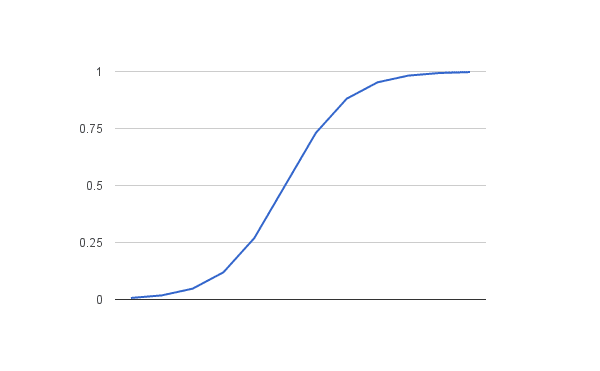
### Formula and cost function 
##### W.r.t. Probability 
logistic model gives the probability as output :<br>
P(x)=y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x)) <br>
**Odds** (also called logit function):<br>
ln(p(X) / 1 – p(X)) = b0 + b1 * X <br>
odds = e^(b0 + b1 * X)

#### W.r.t Geometry point of view :
Let there be 2 grps of points and a linear plane seperates them : points above plane are denoted by +ve and below by -ve<br>
logistic model calculate the distance of points its seperating form itself.by formula  **W(transpose)*x** here x is the pt.
<br>Pts. in direction of normal (above plane) are +ve distance away and below are -ve distance away<br>
**Classification** is said to be correct for a point if **Yi(W(transpose)*x) >0**
<br>here Yi => +ve for +ve pts. and vice versa.<br>
**Optimization** is done by mamimizing **f(sum(Yi(W(transpose)*xi)))**. => Here f is sigmoid function


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
data=pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
data.shape

(891, 12)

In [60]:
# capturing Cabin NANs followed by replacing the NANs by "Missing"
data['missing_cabin']=np.where(data['Cabin'].isnull(),1,0)
data['Cabin'].fillna('Missing',inplace=True)
data.dropna(inplace=True)
data.shape

(712, 13)

In [61]:
data=data.drop(['PassengerId','Name','Ticket'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,missing_cabin
0,0,3,male,22.0,1,0,7.2500,Missing,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,Missing,S,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,Missing,S,1


In [62]:
l=[]
for i in data.Cabin:
    l.append(str(i)[0])
data['Cabin_initial']=l
data=data.drop('Cabin',axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,missing_cabin,Cabin_initial
0,0,3,male,22.0,1,0,7.2500,S,1,M
1,1,1,female,38.0,1,0,71.2833,C,0,C
2,1,3,female,26.0,0,0,7.9250,S,1,M
3,1,1,female,35.0,1,0,53.1000,S,0,C
4,0,3,male,35.0,0,0,8.0500,S,1,M
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,1,M
886,0,2,male,27.0,0,0,13.0000,S,1,M
887,1,1,female,19.0,0,0,30.0000,S,0,B
889,1,1,male,26.0,0,0,30.0000,C,0,C


In [63]:
data=pd.get_dummies(data,drop_first=True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,missing_cabin,Sex_male,Embarked_Q,Embarked_S,Cabin_initial_B,Cabin_initial_C,Cabin_initial_D,Cabin_initial_E,Cabin_initial_F,Cabin_initial_G,Cabin_initial_M,Cabin_initial_T
0,0,3,22.0,1,0,7.2500,1,1,0,1,0,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,0,0,0,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0,1,0,0,0,0,0,0,0,1,0
886,0,2,27.0,0,0,13.0000,1,1,0,1,0,0,0,0,0,0,1,0
887,1,1,19.0,0,0,30.0000,0,0,0,1,1,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,0,1,0,0,0,1,0,0,0,0,0,0


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
x=data.iloc[:,1:]
y=data.iloc[:,:1]


In [95]:
log_reg=LogisticRegression()
log_reg.fit(x,y)
y_pred=log_reg.predict(x)
accuracy=accuracy_score(y,y_pred)
print('Accuracy : ',accuracy)

Accuracy :  0.8061797752808989


C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
cm=confusion_matrix(y,y_pred)
cm

array([[363,  61],
       [ 77, 211]], dtype=int64)

In [97]:
CM=pd.DataFrame(cm,columns=['0(pred)','1(pred)'])
CM

,0(pred),1(pred)
0,363,61
1,77,211


In [98]:
print('Precision : ',cm[0][0]/(cm[0][0]+cm[1][0])) 
print('Recall (TPR) : ',cm[0][1]/(cm[0][0]+cm[0][1])) 

Precision :  0.825
Recall (TPR) :  0.14386792452830188


In [99]:
## manual F1 score : beta=1 as both FP and FN are important
pr=cm[0][0]/(cm[0][0]+cm[1][0])
re=cm[0][1]/(cm[0][0]+cm[0][1])
print('F1 : ',(4*pr*re)/(pr+re))

F1 :  0.4900194741966894


# Logistic Reg One v/s All